# Pick galaxies at random from a Schechter function

In [1]:
import numpy as np

In [2]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
import numpy as np
def simulate_schechter_distribution(alpha, M_star, M_min, N):
    """ 
        Adapted from https://gist.github.com/joezuntz/5056136
        Based on algorithm in http://www.math.leidenuniv.nl/~gill/teaching/astro/stanSchechter.pdf
    """
    n=0
    output = []
    while n<N:
        M = np.random.gamma(scale=M_star, shape=alpha+2, size=N)
        M = M[M>M_min]
        u = np.random.uniform(size=M.size)
        M = M[u<M_min/M]
        output.append(M)
        n+=M.size
    return np.concatenate(output)[:N]

In [6]:
masses = simulate_schechter_distribution(-1.3,3.e10,1.e5,50000)

/Users/hcferguson/anaconda3/envs/astroconda36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 100 artists>

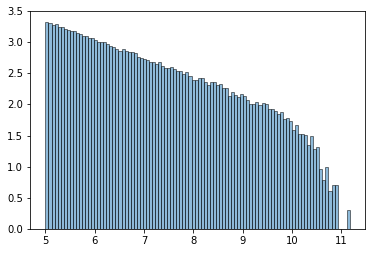

In [7]:
logm = np.log10(masses)
dndlogm,edges = np.histogram(logm,100)
plt.bar(edges[:-1], np.log10(dndlogm), width=np.diff(edges), ec="k", align="edge",alpha=0.5)